In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import sys
sys.path.insert(0,"Loading/")
sys.path.insert(0,"Preprocessing/")
sys.path.insert(0,"Modeling/")
sys.path.insert(0,"Evaluation/")
sys.path.insert(0,"Interpretability/")
sys.path.insert(0,"Monitoring/")
sys.path.insert(0,"Utils/")

import loading
import preprocessing
import modeling
import evaluation
import interpretability
# import metrics 
import utils as u

import json 
import pandas as pd
import numpy as np

#Package allowing to reload a package (or a script), without having to reload the whole notebook
#import importlib #no use if the magic commands in the first cell are working

In [3]:
# Here we find the parameters needed for the run. You have to launch this cell only if you do not launch the main script.

path_conf ="../params/conf/conf.json"

# path_conf ='../conf/conf.json'
conf = json.load(open(path_conf, 'r'))

path_log = conf['path_log'] # "../log/my_log_file.txt"
log_level = conf['log_level'] # "DEBUG"

# Be careful to launch the logger only once, otherwise each lines will be duplicated
logger = u.my_get_logger(path_log, log_level, my_name="main_logger")

In [4]:
#Reload of the conf file (useful when you do modifications)
conf = json.load(open(path_conf, 'r'))

## Loading and Preprocessing

In [5]:
#Reading of the dataset selected in the conf file
df = loading.read_csv_from_name(conf)

In [6]:
preprocessor = preprocessing.MarketingPreprocessor()

In [7]:
selected_dataset = conf['selected_dataset']
file_info = conf['dict_info_files'][selected_dataset]

In [8]:
preprocessed_df = preprocessor(df, column_types=file_info['column_types'])

X_train, X_test, y_train, y_test = preprocessing.basic_split(preprocessed_df, file_info['y_name'])

/Users/henrique/Documents/projects/monitoring-project/src/Preprocessing/preprocessing.py:52: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[' Income '] = data[' Income '].str.replace('$', '')


In [33]:
preprocessed_df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dt_year,Dt_month
0,1989,Graduation,Single,21474.0,1,0,0,6,16,24,...,1,0,0,0,0,1,0,SP,2014,4
1,1979,Master,Together,62499.0,1,0,0,140,4,61,...,0,0,0,0,0,0,0,SP,2013,12
2,1981,Graduation,Married,26872.0,0,0,0,3,10,8,...,0,0,0,0,0,0,0,CA,2013,10
3,1977,Graduation,Married,54809.0,1,1,0,63,6,57,...,0,0,0,0,0,0,0,SP,2013,9
4,1977,Graduation,Married,54809.0,1,1,0,63,6,57,...,0,0,0,0,0,1,0,SP,2013,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1973,Graduation,Divorced,78901.0,0,1,99,321,11,309,...,0,0,0,0,0,0,0,US,2013,9
1083,1976,PhD,Divorced,66476.0,0,1,99,372,18,126,...,0,0,0,0,0,0,0,US,2013,3
1084,1977,2n Cycle,Married,31056.0,1,0,99,5,10,13,...,0,0,0,0,0,0,0,SP,2013,1
1085,1976,Graduation,Divorced,46310.0,1,0,99,185,2,88,...,0,0,0,0,0,0,0,SP,2012,12


In [21]:
loading.write_preprocessed_csv_from_name(preprocessed_df, conf)

'OK'

## Modeling

In [9]:
#Modelisation using the model selected in the conf file
clf, best_params = modeling.main_modeling_from_name(X_train,y_train,conf)

#Saving the model
u.save_model(clf, conf)

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set

/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_war

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set

/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_war

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_lea

/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_war

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set

/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_war

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is s

/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_war

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_lea

/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_war

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200


/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


'OK'

## Evaluation

In [10]:
#Independent step from the other, we reload what we need:

#Loading of the model
clf = u.load_model(conf)
#Loading of the preprocessed dataset
df = loading.load_preprocessed_csv_from_name(conf)

#Basic Splitting:
y_column = u.get_y_column_from_conf(conf)
X_columns = [x for x in df.columns if x != y_column ]
X_train, X_test, y_train, y_test = preprocessing.basic_split( df , 0.25 , X_columns, y_column)

../Outputs/Models/marketing_lightgbm.sav


KeyError: '[0.25] not found in axis'

In [12]:
#Computing metrics
dict_metrics = evaluation.main_evaluation(clf, X_train, y_train, X_test, y_test, conf)
dict_metrics

{'f1_score': 0.43478260869565216,
 'accuracy': 0.8566176470588235,
 'recall': 0.40540540540540543,
 'precision': 0.46875,
 'confusion_matrix': {'tn': 218, 'fp': 17, 'fn': 22, 'tp': 15},
 'auc': 0.6665324899367453,
 'jaccard_score': 0.2777777777777778}

## Interpretabily 

## Monitoring

In [ ]:
# Loading what you need ... etc.

## Chi-squared test

Create fake batch

In [30]:
from sklearn.model_selection import train_test_split

sample_indexes, fake_batch_indexes = train_test_split(
    preprocessed_df.index.to_numpy(), test_size=0.3, random_state=1
)


In [31]:
sample_df = preprocessed_df.loc[preprocessed_df.index.isin(sample_indexes), :]
fake_batch_df = preprocessed_df.loc[preprocessed_df.index.isin(fake_batch_indexes), :]

In [12]:
batch_df = pd.read_csv('../Inputs/Batches/batch1.csv')

In [16]:
preprocessed_batch = preprocessor(batch_df, column_types=file_info['column_types'])

/Users/henrique/Documents/projects/monitoring-project/src/Preprocessing/preprocessing.py:52: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[' Income '] = data[' Income '].str.replace('$', '')


In [18]:
categorical_cols = file_info['column_nature']['categorical_columns']
binary_cols = file_info['column_nature']['binary_columns']
numerical_cols = file_info['column_nature']['numerical_columns']
metrics_dict = file_info["metrics_setup"]
target_col = file_info['y_name']

In [19]:
from monitoring import compute_metrics

compute_metrics(preprocessed_df, preprocessed_batch, clf, metrics_dict)

/Users/henrique/miniforge3/envs/monitoring-project/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'covariate_drift_metrics': {'numerical_metrics': {'Income': {'CSI': {'csi_value': 0.008},
    'kruskal_wallis': {'test_val': 16.065914987259674,
     'p_val': 6.117529225894615e-05},
    'kolmogorov_smirnov': {'test_val': 0.19165777368905243,
     'p_val': 5.166588487037771e-07}},
   'Recency': {'CSI': {'csi_value': 0.058},
    'kruskal_wallis': {'test_val': 2.852031186748042,
     'p_val': 0.0912585728196693},
    'kolmogorov_smirnov': {'test_val': 0.09970193192272309,
     'p_val': 0.03243739455003514}},
   'MntWines': {'CSI': {'csi_value': 3.415},
    'kruskal_wallis': {'test_val': 553.4699824970731,
     'p_val': 2.2137685542725935e-122},
    'kolmogorov_smirnov': {'test_val': 0.877280588776449,
     'p_val': 5.551115123125783e-16}},
   'MntFruits': {'CSI': {'csi_value': 0.719},
    'kruskal_wallis': {'test_val': 253.39343198554272,
     'p_val': 4.727814511762356e-57},
    'kolmogorov_smirnov': {'test_val': 0.74, 'p_val': 5.551115123125783e-16}},
   'MntMeatProducts': {'CSI': {'c

In [31]:
clf

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Education',
                                                   'Marital_Status', 'Country',
                                                   'Kidhome', 'Teenhome'])])),
                ('estimator',
                 LGBMClassifier(estimator__boosting_type='gbdt',
                                estimator__learning_rate=0.01,
                                estimator__max_depth=6,
                                estimator__min_data_in_leaf=10,
                                estimator__num_boost_round=200,
                                estimator__objective='binary',
                                estimator__reg_alpha=0,
                                estimator__scale_pos_weight=10,
       

In [32]:
probabilities = clf.predict_proba(preprocessed_batch)
preds = clf.predict(preprocessed_batch)

In [29]:
preprocessed_batch['preds'] = preds

In [30]:
preprocessed_batch

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dt_year,Dt_month,preds
0,1968,Master,Divorced,63841.0,0,1,64,63500,1500,10000,...,0,0,0,0,0,0,SP,2013,4,0
1,1953,Graduation,Together,94384.0,0,0,62,111100,2400,79000,...,1,1,1,0,1,0,SP,2013,3,1
2,1947,Master,Together,78093.0,0,0,53,36800,3200,63900,...,0,0,0,0,0,0,SA,2013,12,0
3,1956,Master,Together,55249.0,0,1,81,9700,100,1900,...,0,0,0,0,0,0,SP,2014,4,0
4,1963,Graduation,Divorced,68118.0,0,1,51,59500,2300,12300,...,0,0,0,0,0,0,US,2013,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1950,PhD,Together,5648.0,1,1,68,2800,0,600,...,0,0,0,0,0,0,US,2014,3,0
246,1970,Graduation,Single,43020.0,1,0,79,4500,700,9900,...,0,0,0,0,0,0,US,2013,11,0
247,1968,PhD,Divorced,50616.0,0,1,56,12800,0,1600,...,0,0,0,0,0,0,SP,2014,4,0
248,1955,Graduation,Married,50737.0,0,1,61,7800,0,1100,...,1,0,0,0,0,0,SP,2013,5,0


# Visualizations

In [ ]:
import seaborn as sns

In [81]:
i = 2
sample_col = sample_df.loc[:, categorical_columns[i]]
batch_col = fake_batch_df.loc[:, categorical_columns[i]]

sample_freq = sample_col.value_counts(normalize=True)
batch_freq = batch_col.value_counts(normalize=True)

concatenated_df = pd.concat([sample_freq, batch_freq], keys=['Sample', 'Batch']).reset_index()
concatenated_df.columns = ['Data Source', categorical_columns[i], 'Frequency']

<AxesSubplot:xlabel='Country', ylabel='Frequency'>

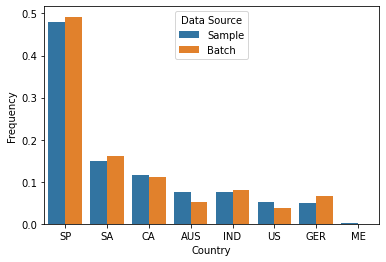

In [82]:
sns.barplot(data=concatenated_df, x=categorical_columns[i], y='Frequency', hue='Data Source')

In [15]:
sample_df.loc[:, categorical_columns[i]]

0       Graduation
1           Master
4       Graduation
7       Graduation
9       Graduation
           ...    
1077    Graduation
1080    Graduation
1082    Graduation
1083           PhD
1085    Graduation
Name: Education, Length: 760, dtype: object

In [10]:
numerical_features=['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']

In [58]:
i = 4

sample_data = sample_df.loc[:, numerical_features[i]]
batch_data = fake_batch_df.loc[:, numerical_features[i]]

sample_values, sample_base = np.histogram(sample_data, bins=np.arange(max(sample_data)), density=True)
batch_values, batch_base = np.histogram(batch_data, bins=np.arange(max(batch_data)), density=True)
#evaluate the cumulative
sample_cumulative = np.cumsum(sample_values)
batch_cumulative = np.cumsum(batch_values)

In [51]:
import matplotlib.pyplot as plt

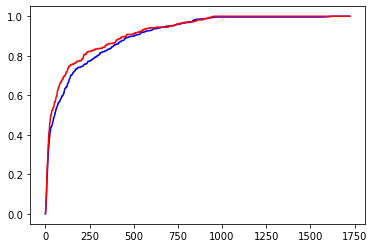

In [59]:
# plot the cumulative function
plt.plot(sample_base[:-1], sample_cumulative, c='blue')
plt.plot(batch_base[:-1], batch_cumulative, c='red')

How to decide when the metrics have decreased too much? 
    - Imagine some fixed parameters -> automatic alert 

